# Simple linear regression

Watch the 9-minute video below for a visual explanation of simple linear regression as a line-fitting problem.

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/PaFPbb66DxQ?start=24" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

[Explaining Linear Regression, by StatQuest](https://www.youtube.com/embed/PaFPbb66DxQ?start=24)
```


Then study the following sections to learn more about simple linear regression with examples in the textbook.

## Install libraries

If you are using Google Colab, you can skip this section. If you are using your own computer, you will need to install the following libraries unless they are already installed:

In [2]:
!pip install statsmodels seaborn

Defaulting to user installation because normal site-packages is not writeable


## Import libraries and load data

Get ready by importing the APIs needed from respective libraries.
<!-- Firstly, we will import the required libraries and load the `Advertising` dataset. -->

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.formula.api import ols

%matplotlib inline

Load the [Advertising dataset](https://github.com/pykale/transparentML/blob/main/data/Advertising.csv) and display the column names, counts and data types.

<!-- Datasets available on https://www.statlearning.com/resources-first-edition -->

In [4]:
data_url = "https://github.com/pykale/transparentML/raw/main/data/Advertising.csv"

advertising_df = pd.read_csv(data_url, header=0, index_col=0)
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Display the first 5 rows for inspection. You can also click [Advertising dataset](https://github.com/pykale/transparentML/blob/main/data/Advertising.csv) to inspect the full data on GitHub, since this dataset is small. It is a good habit to inspect the data before using it.

In [5]:
advertising_df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Linear relationship modelling for regression

Simple linear regression assumes that there is an approximately _linear_ relationship between a quantitative response  (output) $y$ and a single predictor (input) $x$. Mathematically, the linear relationship can be expressed as

```{math}
:label: y_approx_x
y \approx \beta_0 + \beta_1 x
```

where $\beta_0$ and $\beta_1$ are two unknown constants that represent the *bias* and *weight* of this linear model, which are also known as *intercept* and *slope*, respectively. Together, $\beta_0$ and $\beta_1$ are called the *model coefficients*, or *parameters*. We can describe the linear relationship as *regressing* $y$ onto $x$. For example, $x$ may represent `TV` advertising budget (in thousands of dollars) and $y$ may represent `sales` (in thousands of dollars) in the [Advertising dataset](https://github.com/pykale/transparentML/blob/main/data/Advertising.csv). Then we can regress sales onto TV by fitting the model:

<!-- \begin{equation} -->
$$
\textrm{sales} \approx \beta_0 + \beta_1 \times \textrm{TV}
$$
<!-- \end{equation} -->



## Estimating the coefficients

The goal of simple linear regression is to estimate the unknown parameters $\beta_0$ and $\beta_1$ from the data. Let 

$$
(x_1, y_1), (x_2, y_2), \ldots, (x_N, y_N)
$$

be the $N$ observations in the dataset, and $\hat{\beta}_0$ and $\hat{\beta}_1$ denote the estimated values of $\beta_0$ and $\beta_1$, respectively. The estimated values of $\hat{\beta}_0$ and $\hat{\beta}_1$ can be obtained by minimising the [*residual sum of squares* (RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) between the observed response values $y_i$ and the predicted response values $\hat{y}_i$:


```{math}
:label: RSSdef
\text{RSS} = \sum_{i=1}^N (y_i - \hat{y}_i)^2 = \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2,
```

where $y_i$ is the $i\text{th}$ observation of the response $y$, $\hat{y}_i$ is the $i\text{th}$ observation of the predicted response $\hat{y}$, and $x_i$ is the $i\text{th}$ observation of the predictor $x$. The least squares estimates of $\beta_0$ and $\beta_1$ are given as a [closed-form solution](https://mathworld.wolfram.com/Closed-FormSolution.html) by

\begin{equation}
\hat{\beta}_1 = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2},
\end{equation}

\begin{equation}
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}.
\end{equation}

where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$ respectively. The least squares estimates of $\beta_0$ and $\beta_1$ are obtained by minimising the RSS. The least squares line is given by


\begin{equation}
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x.
\end{equation}

The least squares line, also known as the *regression line*, is the straight line that minimises the sum of squared residuals.

Run the code below to fit `sales` onto `TV` for the `Advertising` dataset using the API [`seaborn.regplot`](https://seaborn.pydata.org/generated/seaborn.regplot.html) from the library `seaborn`, which plots data and a linear regression model fit. You are encouraged to click the hyperlink to the API to learn more about its usage. The data are shown as red dots and the regression line is shown in blue.

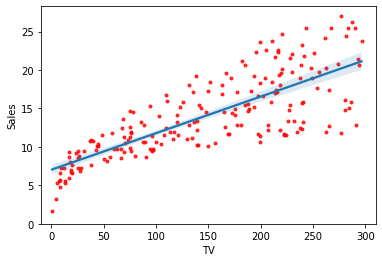

In [6]:
sns.regplot(
    x=advertising_df.TV,
    y=advertising_df.Sales,
    order=1,
    x_ci="ci",
    scatter_kws={"color": "r", "s": 9},
)
plt.xlim(-10, 310)
plt.ylim(ymin=0)
plt.show()

You should see a figure generated. This figure shows the least squares fit of `sales` onto `TV` for the `Advertising` dataset. The objective is to minimise the sum of squared residuals, which is the sum of the squared vertical distances, i.e. the _errors_, between the data points (red dots) and the least squares line (blue line). 

<!-- **Example: fitting a linear regression model and visualising regression coefficients using `scikit-learn`** -->
## Example: model fitting and visualisation using `scikit-learn`

Now we use the [`LinearRegression` class in `scikit-learn`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit a linear regression model, in order to delve into the details of the a model that minimizes the residual sum of squares (RSS). The [`.fit()` method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) takes two arguments, the first is the predictor variable and the second is the response variable. The `.fit()` method returns an object that contains the estimated coefficients. The model generates the fit by minimizing the RSS between the observed targets in the dataset, and the targets predicted by the linear approximation. The `.intercept_` and `.coef_` attributes of the fitted model can be used to obtain the estimated intercept ($\beta_0$) and slope ($\beta_1$) of the regression line. 

<!-- 
Note that the text in the book describes the coefficients based on unnormalised data, whereas the plot shows the model based on normalised data. The latter is visually more appealing for explaining the concept of a minimum RSS. I think that, in order not to confuse the reader, the values on the axis of the `beta_0` coefficients have been changed to correspond with the text. The axes on the plots below are unaltered. -->

Firstly, fit a linear regression model. Before fitting, we centre the data by subtracting the mean of each variable from each observation via a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). This is a common practice in machine learning called [data normalization](https://en.wikipedia.org/wiki/Feature_scaling), and essentially makes it easier for our model to learn from the data.

Mean removed from input features:  [147.0425]
Regression model intercept (bias):  14.0225
Regression model slop (weight):  [0.04753664]


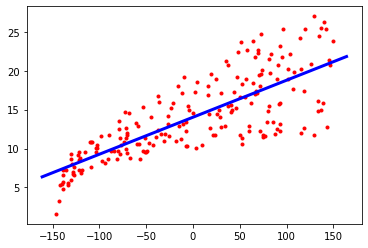

In [39]:
# Regression coefficients (Ordinary Least Squares)
regr = LinearRegression()

scale = StandardScaler(with_mean=True, with_std=False)
X = scale.fit_transform(advertising_df.TV.values.reshape(-1, 1))
y = advertising_df.Sales

regr.fit(X, y)
print("Mean removed from input features: ", scale.mean_)
print("Regression model intercept (bias): ", regr.intercept_)
print("Regression model slop (weight): ", regr.coef_)

#Plot the data and the regression line
axes = plt.gca()

plt.scatter(X, y, color="r", s=9)
x_vals = np.array(axes.get_xlim())
y_vals = regr.intercept_ + regr.coef_ * x_vals
plt.plot(x_vals, y_vals, '-', linewidth=3, color="blue")


Check the input data.

In [8]:
X.shape

(200, 1)

Now let's visualize the RSS value for different choices of intercept $\beta_0$ and slope $\beta_1$.

First, create grid coordinates for plotting and computing the minimum of RSS.

In [9]:
beta_0 = np.linspace(regr.intercept_ - 2, regr.intercept_ + 2, 50)
beta_1 = np.linspace(regr.coef_ - 0.02, regr.coef_ + 0.02, 50)
xx, yy = np.meshgrid(beta_0, beta_1, indexing="xy")
Z = np.zeros((beta_0.size, beta_1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = ((y - (xx[i, j] + X.ravel() * yy[i, j])) ** 2).sum() / 1000

# minimised RSS
min_RSS = r"$\beta_0$, $\beta_1$ for minimised RSS"
min_rss = (
    np.sum((regr.intercept_ + regr.coef_ * X - y.values.reshape(-1, 1)) ** 2) / 1000
)
min_rss

2.1025305831313514

Plot the RSS with corresponding $\beta_0$ and $\beta_1$ in 2D and 3D.

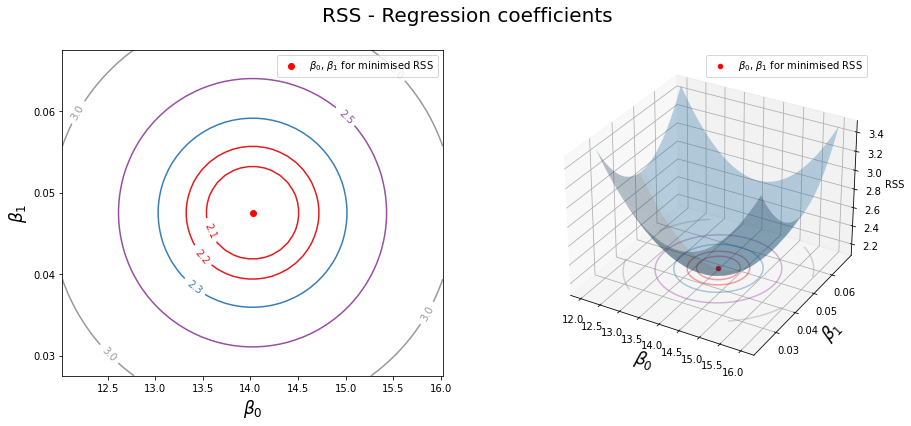

In [10]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("RSS - Regression coefficients", fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c="r", label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt="%1.1f")

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(
    xx,
    yy,
    Z,
    zdir="z",
    offset=Z.min(),
    cmap=plt.cm.Set1,
    alpha=0.4,
    levels=[2.15, 2.2, 2.3, 2.5, 3],
)
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c="r", label=min_RSS)
ax2.set_zlabel("RSS")
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r"$\beta_0$", fontsize=17)
    ax.set_ylabel(r"$\beta_1$", fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()

On the right, we can see a 3D representation of RSS as a function of $\beta_0$ and $\beta_1$. The minimum of RSS is at the point where $\beta_0 = 14.0225$ and $\beta_1 = 0.0475$. The left plot shows a 2D top-down contour of the 3D plot, showing that as we move away from the minimum, the RSS value increases.

## Example explanation of system transparency

Run the cell below for understanding the system transparency for linear regression models.

Predicted sales for TV = 100:  11.78625759242967
Predicted sales for TV = 147.0425 (mean):  14.0225
Predicted sales for TV = 200:  16.539921635731645


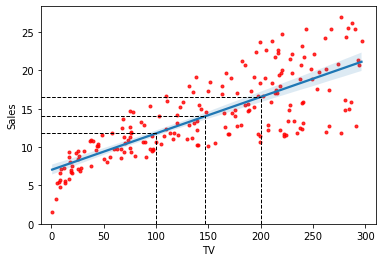

In [11]:
sns.regplot(
    x=advertising_df.TV,
    y=advertising_df.Sales,
    order=1,
    x_ci="ci",
    scatter_kws={"color": "r", "s": 9},
)

x1 = 100
y1 = (regr.intercept_ + regr.coef_ * (x1 - scale.mean_))[0]
print("Predicted sales for TV = 100: ", y1)
plt.plot((x1, x1), (0, y1), "k--", lw=1)
plt.plot((-10, x1), (y1, y1), "k--", lw=1)

x_mean = scale.mean_[0]
y_ = (regr.intercept_ + regr.coef_ * (x_mean - scale.mean_))[0]
print("Predicted sales for TV = %s (mean): " % x_mean, y_)
plt.plot((x_mean, x_mean), (0, y_), "k--", lw=1)
plt.plot((-10, x_mean), (y_, y_), "k--", lw=1)

x2 = 200
y2 = (regr.intercept_ + regr.coef_ * (x2 - scale.mean_))[0]
print("Predicted sales for TV = 200: ", y2)
plt.plot((x2, x2), (0, y2), "k--", lw=1)
plt.plot((-10, x2), (y2, y2), "k--", lw=1)

plt.xlim(-10, 310)
plt.ylim(ymin=0)
plt.show()

In the above example, we learnt a linear regression model $f(x)$ with two parameters, $\beta_0$ and $\beta_1$, from the data, where
- $\beta_0 = 14.0225 $ is the `sales` when input value `TV` equals to its mean, i.e., 147.0425, and
- $\beta_1 = 0.0475 $ is the change of units in the `sales` when `TV` increases by 1 unit.

Using these two estimated parameters, we can examine the system logic of the simple linear regression model to reveal its system transparency.

```{admonition} System transparency
:class: important

- When `TV`$=200$, the predicted `sales` $f(200) \approx 16.54 = \beta_1 \times (200 - 147.04) + f(147.04)$, which can be derived from the linear regression equation: $f(x) = \beta_1 \times (x - \bar{x}) + \beta_0 = \beta_1 \times (x - \bar{x}) + f(\bar{x}) $. 

- To produce an estimated `sales` of $\hat{y}$, e.g. 18, we locate 18 on the vertical axis and then move horizontally to find the fitted line to find the corresponding `TV` value on the horizontal axis, i.e., ~230, which can be analytically obtained using the inverse function of the learnt linear regression model $f(x)$ $x = \frac{\hat{y} - \beta_0}{\beta_1} + \bar{x}$ (giving 230.78).

``` 

## Assessing model accuracy via $R^2$

The accuracy of the linear model is dependent on the variability of the response $y$ and the predictor $x$. The variability of $y$ is measured by the variance of $y$, denoted by $\sigma_y^2$. The variability of $x$ is measured by the variance of $x$, denoted by $\sigma_x^2$. The [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), denoted by $R^2$, is defined as

\begin{equation}
R^2 = \frac{\text{TSS} - \text{RSS}}{\text{TSS}} = 1 - \frac{\text{RSS}}{\text{TSS}}
\end{equation}

where $\text{TSS} = \sum_{i=1}^N (y_i - \bar{y})^2$ *is the total sum of squares*. Dividing the RSS by the total number of training samples gives the *mean squared error* (MSE) of the model. The MSE is the average squared distance between the observed response values and the response values predicted by the model. The MSE is also known as the *mean squared prediction error* (MSPE). The MSE is defined as

```{math}
:label: MSEdef
\text{MSE} = \frac{1}{N} \text{RSS} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i)^2.
```

The coefficient of determination $R^2$ measures the proportion of the _total_ variance in the response $y$ that is explained by the linear model using the predictor $x$. $R^2$ is always between 0 and 1: it is 0 when the regression line does not fit the data at all, and it is 1 when the regression line perfectly fits the data. $R^2$ is also known as the *coefficient of multiple determination* and it is a measure of the goodness of fit of the linear model. 

Watch the 11-minute video below to learn more about $R^2$

```{admonition} Video
<iframe width="700" height="394" src="https://www.youtube.com/embed/2AQKmw14mHM?start=16" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe> 

[Explaining $R^2$, by StatQuest](https://www.youtube.com/embed/2AQKmw14mHM?start=16)
```

Run the following code to fit a simple linear regression model using `scikit-learn`.

In [12]:
regr = LinearRegression()

X = advertising_df.TV.values.reshape(-1, 1)
y = advertising_df.Sales

regr.fit(X, y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127695
[0.04753664]


Then evaluate the learnt model with $R^2$ via [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) (Table 3.1 & 3.2 of the text book).

In [13]:
sales_pred = regr.predict(X)
print("R2 score:", r2_score(y, sales_pred))
print("Mean squared error: ", mean_squared_error(y, sales_pred))

R2 score: 0.611875050850071
Mean squared error:  10.512652915656757


From the result, we can see that the simple linear regression model explains about 61% of the variance of the response data around its mean, leaving about 39% (RSS) unexplained.

## Standard errors and residual standard error

*Advanced: advanced contents are optional.

The linear relationship between $x$ and $y$ can be written in an equation, rather than an approximation earlier in Equation {eq}`y_approx_x`, as

\begin{equation}
y = \beta_0 + \beta_1 x + \epsilon,
\end{equation}

where $\epsilon$ is a random error term that represents the difference (i.e. the error, unexplained part) between the observed response $y$ and the true response $\beta_0 + \beta_1 x$. The error term $\epsilon$ is assumed to be normally distributed with mean zero and constant variance $\sigma^2$. The coefficient estimates $\hat{\beta}_0$ and $\hat{\beta}_1$ are only estimates of the true coefficients $\beta_0$ and $\beta_1$. We can quantify the accuracy of the estimates by computing the [*standard error*](https://en.wikipedia.org/wiki/Standard_error) of the estimates. The following formulas can be used to compute the standard error associated with $\hat{\beta}_1$ and $\hat{\beta}_0$:

\begin{equation}
\text{SE}(\hat{\beta}_{1})^2 = \frac{\sigma^2}{\sum_{i=1}^N (x_i - \bar{x})^2}, \quad \text{SE}(\hat{\beta}_0)^2 = \sigma^2 \left[\frac{1}{N} + \frac{\bar{x}^2}{\sum_{i=1}^N (x_i - \bar{x})^2} \right],
\end{equation}

where $\sigma^2$ is an estimate of the variance of the error term $\epsilon= y - (\beta_0 + \beta_1 x) $, $\hat{y}_i$ is the $i\text{th}$ observation of the predicted response $\hat{y}$, and $x_i$ is the $i\text{th}$ observation of the predictor $x$, $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$ respectively. 

In general, $\sigma^2$ is unknown, so we need to estimate it from the *residual standard error* (RSE) below

\begin{equation}
\text{RSE} = \sqrt{\frac{1}{N-2}\text{RSS}} = \sqrt{\frac{1}{N-2} \sum_{i=1}^N (y_i - \hat{y}_i)^2}.
\end{equation}

RSE is also _another way to assess the quality of a linear regression fit_ (in terms of error). Due to the presence of the error term $\epsilon$, perfect prediction is not possible even if we know the true regression line (unless $\epsilon$ is zero, rarely the case in practice). The RSE is an estimate of the standard deviation of $\epsilon$. It is the average amount that the response will deviate from the true regression line, measuring the lack of fit of the model to the data. The smaller the RSE, the better the model fits the data. 

## Confidence intervals

The standard error indicates the average amount that an estimate differs from its actual value. Thus, the standard error of $\hat{\beta}_1$ is a measure of the average amount that $\hat{\beta}_1$ will deviate from the its true value $\beta_1$. The standard error of $\hat{\beta}_0$ is a measure of the average amount that $\hat{\beta}_0$ will deviate from the its true value $\beta_0$.

Standard errors can be used to compute [confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval). A 95\% is defined as a range of values such that with 95 \% probability, the range (interval) will contain the true unknown value of the parameter. The range is defined in terms of lower and upper limits computed from the sample of data. For linear regression, the 95% confidence intervals for $\beta_1$ and $\beta_0$ approximately takes the form

\begin{equation}
\hat{\beta}_1 \pm 2 \times \text{SE}(\hat{\beta}_1),\:\: \hat{\beta}_0 \pm 2 \times \text{SE}(\hat{\beta}_0).
\end{equation}

The above can be interpreted as there is an approximately 95% chance that the interview $[\hat{\beta}_1 - 2 \times \text{SE}(\hat{\beta}_1), \hat{\beta}_1 + 2 \times \text{SE}(\hat{\beta}_1)] will contain the true value of $\beta_1$, and the interval $[\hat{\beta}_0 - 2 \times \text{SE}(\hat{\beta}_0), \hat{\beta}_0 + 2 \times \text{SE}(\hat{\beta}_0)]$ will contain the true value of $\beta_0$.

Run the following code to compute the statistics, including the confidence intervals, of the learnt model using `statesmodels` (page 67 & Table 3.1 & 3.2 of the textbook).

In [14]:
est = ols("Sales ~ TV", advertising_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


Note that the above did _NOT_ standardise the input by removing its mean so its intercept differs from the one in the previous section. The above includes some additional statistics. The last two columns are the 95% confidence intervals. The 5th column is the $p$-values of the coefficients, which are used to test the significance of the coefficients. The $p$-values are computed using the [$t$-test](https://en.wikipedia.org/wiki/Student%27s_t-test) for the [null hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) that the coefficient is zero.  The 4th column is the $t$ statistic value. The $p$-values are used to determine whether the coefficient is statistically significant. The smaller the $p$-value, the more likely it is that the coefficient is statistically significant. The $p$-values are also used to determine whether the model is statistically significant. The model is statistically significant if the $p$-value is less than the significance level (e.g. 0.05).

We can verify that the RSS computed via `statsmodels` is the same as that obtained via `scikit-learn`.

In [15]:
# RSS with regression coefficients
(
    (advertising_df.Sales - (est.params[0] + est.params[1] * advertising_df.TV)) ** 2
).sum() / 1000

2.102530583131351

## Exercise

**1**. All the following exercises involve the use of **[Carseats](https://github.com/pykale/transparentML/blob/main/data/Carseats.csv)** dataset.

Use the **LinearRegression()** function to perform a simple linear regression with **Sales** as the response and **Price** as the predictor. Find out the **weight** and **bias** of the regression model. Don't forget to use **StandardScaler** to preprocess the data before fitting. **Hint**: See Section [2.1.5](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-model-fitting-and-visualisation-using-scikit-learn).

In [16]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

carseats_df = pd.read_csv(
    "https://github.com/pykale/transparentML/raw/main/data/Carseats.csv"
)

regr = LinearRegression()

scale = StandardScaler(with_mean=True, with_std=False)
X = scale.fit_transform(carseats_df.Price.values.reshape(-1, 1))
y = carseats_df.Sales

regr.fit(X, y)
print("Regression model intercept (bias): ", regr.intercept_)
print("Regression model slop (weight): ", regr.coef_)

Regression model intercept (bias):  7.496325000000001
Regression model slop (weight):  [-0.05307302]


**2**. Plot the response **Sales** and predictor **Price**. Use the **regplot()** function to display the least-squared regression line. **Hint**: See Section [2.1.4](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#linear-relationship-modelling-for-regression).

In [18]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

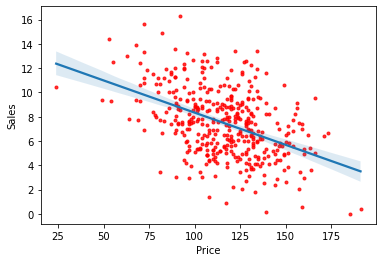

In [19]:
# Let's plot our predicted regression
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(
    x=carseats_df.Price,
    y=carseats_df.Sales,
    order=1,
    x_ci="ci",
    scatter_kws={"color": "r", "s": 9},
)
plt.show()

**3**. We learned a linear regression model $f(x)$ with two parameters weight ($\beta_1$) and bias ($\beta_0$), where we already have the weight and bias of the model from **[Exercise-1](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2:~:text=2.1.10.%20Exercise-,1.,-This%20question%20involves)**. Using these two estimated parameters, we can examine the system logic of the simple linear regression model to reveal its system transparency. Using the below linear regression equation, predict the sales when the price = 77 and 134. Visualize them on the regression plot. **Hint**: Sec Section [2.1.6](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-explanation-of-system-transparency).

$$
f(x) = \beta_1 \times (x - \bar{x}) + \beta_0
$$

In [20]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

Predicted sales for Price = 77:  9.55529275256458
Predicted sales for Price = 134:  6.530130698274568


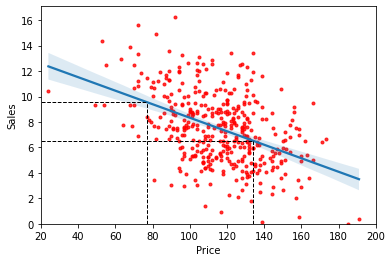

In [21]:
sns.regplot(
    x=carseats_df.Price,
    y=carseats_df.Sales,
    order=1,
    x_ci="ci",
    scatter_kws={"color": "r", "s": 9},
)

x1 = 77
y1 = (regr.intercept_ + regr.coef_ * (x1 - scale.mean_))[0]
print("Predicted sales for Price = 77: ", y1)
plt.plot((x1, x1), (0, y1), "k--", lw=1)
plt.plot((-10, x1), (y1, y1), "k--", lw=1)

x2 = 134
y2 = (regr.intercept_ + regr.coef_ * (x2 - scale.mean_))[0]
print("Predicted sales for Price = 134: ", y2)
plt.plot((x2, x2), (0, y2), "k--", lw=1)
plt.plot((-10, x2), (y2, y2), "k--", lw=1)
plt.xlim(20, 200)
plt.ylim(ymin=0)
plt.show()

**4**. Create the grid coordinates for plotting and compute the minimum RSS of the trained model from **[Exercise-1](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2:~:text=2.1.10.%20Exercise-,1.,-This%20question%20involves)**. **Hint**: See Section [2.1.5](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-model-fitting-and-visualisation-using-scikit-learn).

In [22]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [23]:
beta_0 = np.linspace(regr.intercept_ - 2, regr.intercept_ + 2, 50)
beta_1 = np.linspace(regr.coef_ - 0.02, regr.coef_ + 0.02, 50)
xx, yy = np.meshgrid(beta_0, beta_1, indexing="xy")
Z = np.zeros((beta_0.size, beta_1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = ((y - (xx[i, j] + X.ravel() * yy[i, j])) ** 2).sum() / 1000

# minimised RSS
min_RSS = r"$\beta_0$, $\beta_1$ for minimised RSS"
min_rss = (
    np.sum((regr.intercept_ + regr.coef_ * X - y.values.reshape(-1, 1)) ** 2) / 1000
)
print("Minimum of RSS is %f" % min_rss)

Minimum of RSS is 2.552244


**5.** Use the grid coordinates from **[Exercise-4]()** and plot the RSS with the corresponding bias and weight from **[Exercise-1](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2:~:text=2.1.10.%20Exercise-,1.,-This%20question%20involves)** in 2D and 3D. **Hint**: See Section [2.1.5](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#example-model-fitting-and-visualisation-using-scikit-learn).

In [24]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

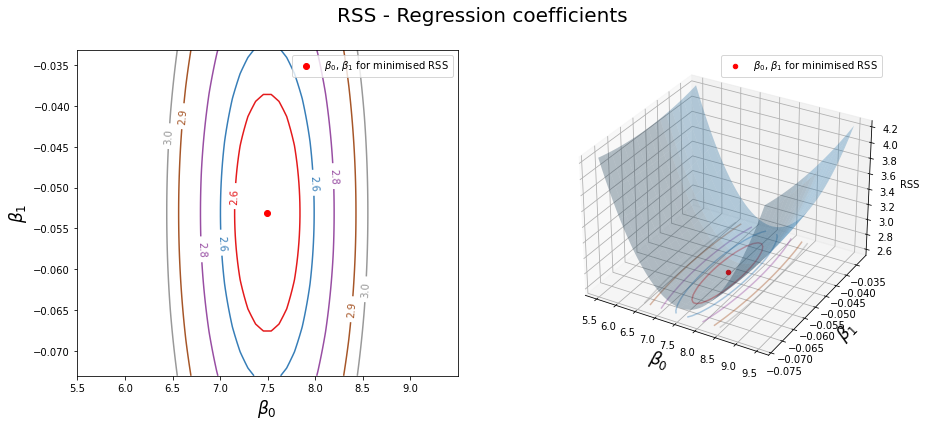

In [25]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("RSS - Regression coefficients", fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.60, 2.65, 2.75, 2.9, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c="r", label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt="%1.1f")

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(
    xx,
    yy,
    Z,
    zdir="z",
    offset=Z.min(),
    cmap=plt.cm.Set1,
    alpha=0.4,
    levels=[2.60, 2.65, 2.75, 2.9, 3],
)
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c="r", label=min_RSS)
ax2.set_zlabel("RSS")
ax2.set_zlim(Z.min(), Z.max())


# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r"$\beta_0$", fontsize=17)
    ax.set_ylabel(r"$\beta_1$", fontsize=17)
    ax.legend()

**6.** Evaluate the learned model from **[Exercise-1](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2:~:text=2.1.10.%20Exercise-,1.,-This%20question%20involves)** accuracy using $R^2$ score and Means Squared Error (MSE). **Hint**: See Section [2.1.7](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2).

In [26]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regr.predict(X)
print("R2 score:", r2_score(y, y_pred))
print("Mean squared error: ", mean_squared_error(y, y_pred))

R2 score: 0.19798115021119478
Mean squared error:  6.3806107320036825


**i**. Has  this model fitted the data well?

*Compare your answer with the solution below*

```{toggle}
**No. As we know, $R^2$ is 0 when the model does not fit the data at all, and it is 1 when the model perfectly fits the data. We got $R^2$ score of 0.197, which is pretty low and near 0, which means the model does fit the data well.**
```

**ii**. $R^2$ score always varies from -1 to 1.

        a. True
        
        b. False

*Compare your answer with the solution below*

```{toggle}
**b. False**
```

**7.** Use the **statsmodels** library to learn a model for the same predictor and response from **[Exercise-1](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#assessing-model-accuracy-via-r-2:~:text=2.1.10.%20Exercise-,1.,-This%20question%20involves)** and compute the statistics, including the confidence intervals. **Hint**: See Section [2.1.9](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#confidence-intervals)

In [28]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [29]:
from statsmodels.formula.api import ols

est = ols("Sales ~ Price", carseats_df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,13.6419,0.633,21.558,0.000,12.398,14.886
Price,-0.0531,0.005,-9.912,0.000,-0.064,-0.043


**i**. What is the minimum value of $95\%$ confidence intervals in this model for weight parameter?

*Compare your answer with the solution below*

```{toggle}
**-0.064**
```

**ii**. Is there a relationship between the predictor and the response?

*Compare your answer with the solution below*

```{toggle}
**Yes, the low P-value associated with the t-statistic for price suggests so.**
```

**iii**. How strong is the relationship between the predictor and the response?

*Compare your answer with the solution below*

```{toggle}
**For a unit increase in price, our model predicts sales will decrease by -0.0531. So, for example, increasing the price by 20 is expected to decrease efficiency by -1.062 sales.**
```

**iv**.  Is the relationship between the predictor and the response positive or negative?

*Compare your answer with the solution below*

```{toggle}
**Negative**
```

**8.** Compute the RSS value for the new model and verify that the RSS computed via **statsmodels** is the same as that obtained via **scikit-learn**. **Hint**: See Section [2.1.9](https://pykale.github.io/transparentML/02-linear-reg/simple-linear-regression.html#confidence-intervals)

In [30]:
# Write your code below to answer the question

*Compare your answer with the reference solution below*

In [31]:
# RSS with regression coefficients
(
    (carseats_df.Sales - (est.params[0] + est.params[1] * carseats_df.Price)) ** 2
).sum() / 1000

2.5522442928014724